1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Covariance matrix:
 [[ 0.9544717   1.00791176  2.91685516]
 [ 1.00791176  9.99585034 12.01167387]
 [ 2.91685516 12.01167387 17.84538419]] 

Eigenvalues PCA:
 [2.68938106e+01 1.64816263e-16 1.90189563e+00] 

Eigenvectors PCA:
 [[-0.1132449  -0.81649658  0.56613508]
 [-0.58012613 -0.40824829 -0.70483119]
 [-0.80661593  0.40824829  0.42743897]] 

Eigenvalues SVD:
 [2.90174519e+01 2.00150752e+00 4.60924889e-31] 

Eigenvectors SVD:
 [[-0.10320626 -0.59251114 -0.79892366]
 [-0.56805088  0.69445222 -0.44164954]
 [ 0.81649658  0.40824829 -0.40824829]] 


Are eigenvalues approximately equal? False
Are eigenvectors approximately equal? False
Dataset's variability: [0.9354747046429288, 0.0645252953570711, 1.4859456830633874e-32] 



Text(0.5, 1.0, '[x1, x2] Projection')

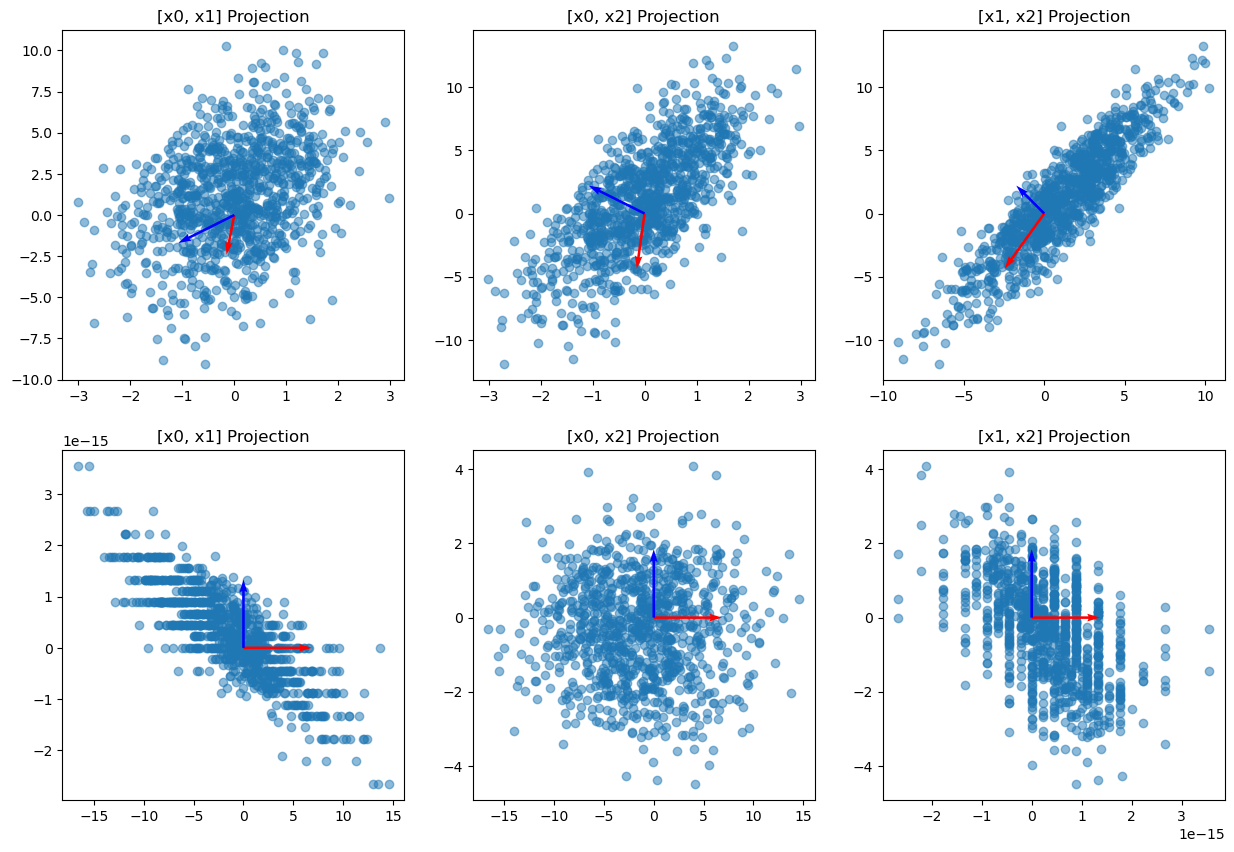

In [2]:
from scipy import stats, linalg as la
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


x1 = np.random.normal(loc = 0, scale = 1, size = (1000,))
x2 = x1 + np.random.normal(loc = 1, scale = 3, size = (1000,))
x3 = 2*x1 +x2

x = np.vstack([x1,x2,x3]).T

#PCA
cov = np.cov(x, rowvar = False)
print("Covariance matrix:\n", cov, '\n')

l, V = la.eig(cov)
l = np.real_if_close(l)

print("Eigenvalues PCA:\n", l, '\n')
print("Eigenvectors PCA:\n", V, '\n')


#SVD
U, D, Vt = la.svd(x)
N = 1000
l1 = D**2/(N-1)
l1 = np.real_if_close(l1)

print("Eigenvalues SVD:\n", l1, '\n')
print("Eigenvectors SVD:\n", Vt, '\n')


eigenvalues_equal = np.allclose(Vt, V)
eigenvectors_equal = np.allclose(np.abs(l1), np.abs(l))

print("\nAre eigenvalues approximately equal?", eigenvalues_equal)
print("Are eigenvectors approximately equal?", eigenvectors_equal)


#What percent of the total dataset's variability is explained by the principal components? 
#Given how the dataset was constructed, do these make sense?
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained


# Percentage of dataset's variability
explained_variances = []
for i in range(len(l1)):
    explained_variances.append(l1[i] / np.sum(l1))
 
print("Dataset's variability:", explained_variances, '\n')


#The initial principal component accounts for approximately 93% of the variability in the data. 
#When considering both the first and second components together, they explain more than 99% of the variability in the data. 
#Given that the third feature is a linear combination of the other two, 
#it follows that this third feature is inconsequential in elucidating the observed variability in the dataset.

#plot autovettori

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original Basis
axes[0, 0].scatter(x[:, 0], x[:, 1], alpha=0.5)
axes[0, 0].quiver(0, 0, V[0, 0], V[1, 0], scale=5, color='red')
axes[0, 0].quiver(0, 0, V[0, 1], V[1, 1], scale=5, color='blue')
axes[0, 0].set_title('[x0, x1] Projection')

axes[0, 1].scatter(x[:, 0], x[:, 2], alpha=0.5)
axes[0, 1].quiver(0, 0, V[0, 0], V[2, 0], scale=5, color='red')
axes[0, 1].quiver(0, 0, V[0, 1], V[2, 1], scale=5, color='blue')
axes[0, 1].set_title('[x0, x2] Projection')

axes[0, 2].scatter(x[:, 1], x[:, 2], alpha=0.5)
axes[0, 2].quiver(0, 0, V[1, 0],V[2, 0], scale=5, color='red')
axes[0, 2].quiver(0, 0, V[1, 1], V[2, 1], scale=5, color='blue')
axes[0, 2].set_title('[x1, x2] Projection')


Xp = np.dot(x, V)

axes[1, 0].scatter(Xp[:, 0], Xp[:, 1], alpha=0.5)
axes[1, 0].quiver(0, 0, 1,0 , scale=5, color='red')
axes[1, 0].quiver(0, 0, 0,1 , scale=5, color='blue')
axes[1, 0].set_title('[x0, x1] Projection')

axes[1, 1].scatter(Xp[:, 0], Xp[:, 2], alpha=0.5)
axes[1, 1].quiver(0, 0, 1,0 , scale=5, color='red')
axes[1, 1].quiver(0, 0, 0, 1, scale=5, color='blue')
axes[1, 1].set_title('[x0, x2] Projection')

axes[1, 2].scatter(Xp[:, 1], Xp[:, 2], alpha=0.5)
axes[1, 2].quiver(0, 0, 1,0 ,scale=5, color='red')
axes[1, 2].quiver(0, 0,0,1, scale=5, color='blue')
axes[1, 2].set_title('[x1, x2] Projection')


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Eigendecomposition:
 [ 2.68938325e+01  1.90190655e+00 -1.73442235e-15  2.07566800e-03
  2.85490146e-03  2.18046098e-03  2.28709460e-03  2.36282409e-03
  2.73390779e-03  2.46986325e-03  2.51753826e-03  2.59511209e-03
  2.63919340e-03]
SVD:
 [2.90174701e+01 2.00151823e+00 2.85507120e-03 2.73462731e-03
 2.63941915e-03 2.59930184e-03 2.51879504e-03 2.47631498e-03
 2.36495533e-03 2.28988565e-03 2.18316053e-03 2.07584121e-03
 9.97225915e-31]
Eigendecomposition:
 [[-1.13244874e-01 -5.66133388e-01 -1.14547243e-03 -2.76049037e-04
   2.35506232e-05  3.14652399e-04  4.92459248e-04  3.06445350e-04
  -2.91459434e-04  9.44066892e-05 -7.39698288e-06  1.64835727e-05
   8.16496581e-01]
 [-5.80125872e-01  7.04829476e-01  1.16673225e-03  6.04556449e-04
   1.75061872e-04 -5.03981827e-04 -3.22543310e-04 -5.77024624e-04
   2.86618441e-04 -3.92446695e-04  1.77075764e-04  9.21522099e-06
   4.08248290e-01]
 [-8.06615620e-01 -4.27437300e-01 -1.12421261e-03  5.24583744e-05
   2.22163119e-04  1.25322970e-04  6.62

Text(0.5, 1.0, 'PCA [PC2, PC3] Projection')

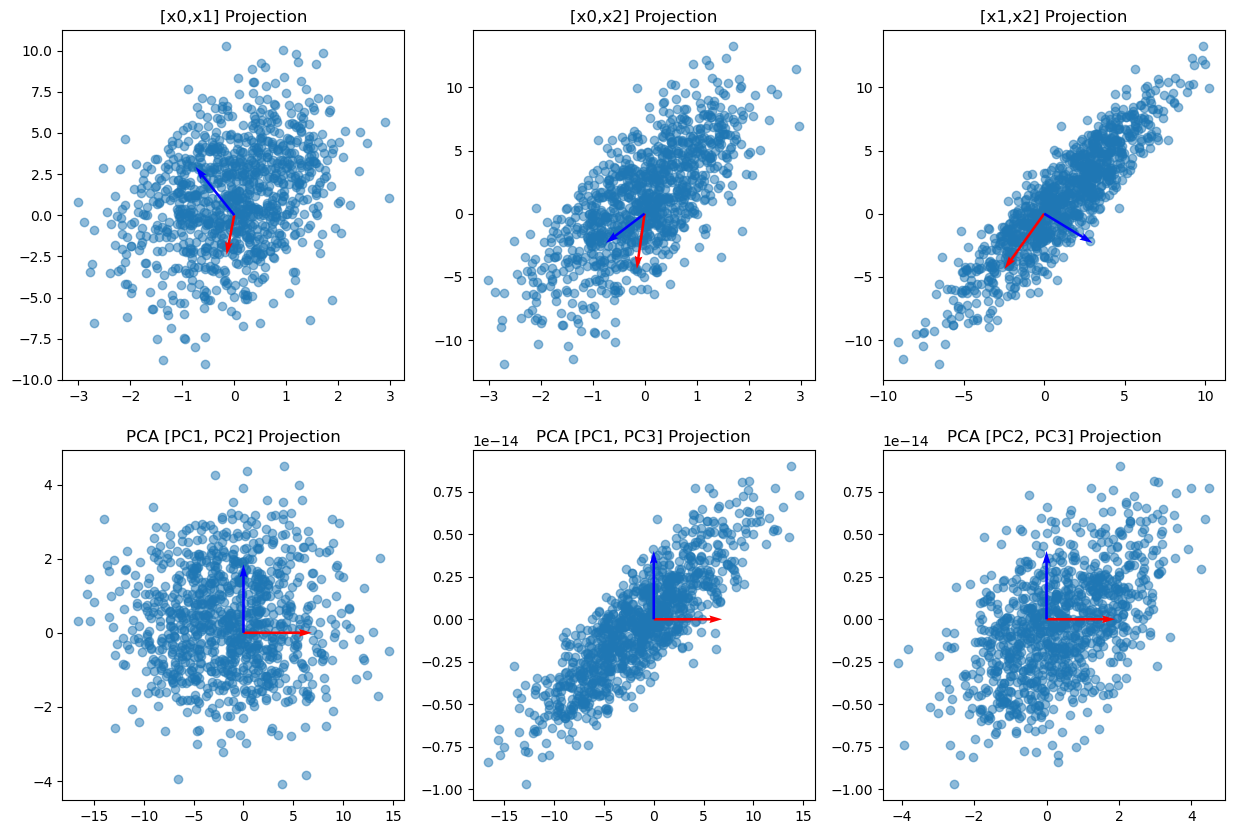

In [5]:
num_noise_variables = 10
noise_std_dev = 1 / 20  # Smaller standard deviation


uncorrelated_noise = np.random.normal(0, noise_std_dev, size=(N, num_noise_variables))
dt_n = np.column_stack((x, uncorrelated_noise))

cov = np.cov(dt_n, rowvar=False)
l, V = la.eig(cov)


sorted_indices = np.argsort(l)[::-1]

V_sorted = V[:, sorted_indices]

l = np.real_if_close(l)


#Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result

U, S, Vt = np.linalg.svd(dt_n)


autval = S**2/ (N-1)


# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", autval)

# Compare Eigenvectors
print("Eigendecomposition:\n", V_sorted)
print("SVD:\n", Vt.T)



# Percentage of dataset's variability
explained_variances = []
for i in range(len(autval)):
    explained_variances.append(autval[i] / np.sum(autval))
 
print("Dataset's variability:", explained_variances, '\n')


# Redefine the data in the new basis from PCA

pca_data = np.dot(dt_n,V)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original Basis
axes[0,0].scatter(dt_n[:,0], dt_n[:,1], alpha = 0.5)
axes[0,0].quiver(0,0, V[0,0], V[1,0], scale = 5, color = 'red')
axes[0,0].quiver(0,0, V[0,1], V[1,1], scale = 5, color = 'blue')
axes[0,0].set_title('[x0,x1] Projection')

axes[0,1].scatter(dt_n[:,0], dt_n[:,2], alpha = 0.5)
axes[0,1].quiver(0,0, V[0,0], V[2,0], scale = 5, color = 'red')
axes[0,1].quiver(0,0, V[0,1], V[2,1], scale = 5, color = 'blue')
axes[0,1].set_title('[x0,x2] Projection')


axes[0,2].scatter(dt_n[:,1], dt_n[:,2], alpha = 0.5)
axes[0,2].quiver(0,0, V[1,0], V[2,0], scale = 5, color = 'red')
axes[0,2].quiver(0,0, V[1,1], V[2,1], scale = 5, color = 'blue')
axes[0,2].set_title('[x1,x2] Projection')

#  Basis PCA

axes[1, 0].scatter(pca_data[:,0], pca_data[:,1], alpha = 0.5)
axes[1, 0].quiver(0, 0, 1, 0, scale=5, color='red')
axes[1, 0].quiver(0, 0, 0, 1, scale=5, color='blue')
axes[1, 0].set_title('PCA [PC1, PC2] Projection')

axes[1, 1].scatter(pca_data[:, 0], pca_data[:, 2], alpha=0.5)
axes[1, 1].quiver(0, 0, 1, 0, scale=5, color='red')
axes[1, 1].quiver(0, 0, 0, 1, scale=5, color='blue')
axes[1, 1].set_title('PCA [PC1, PC3] Projection')

axes[1, 2].scatter(pca_data[:, 1], pca_data[:, 2], alpha=0.5)
axes[1, 2].quiver(0, 0, 1, 0, scale=5, color='red')
axes[1, 2].quiver(0, 0, 0, 1, scale=5, color='blue')
axes[1, 2].set_title('PCA [PC2, PC3] Projection')



#After removing correlation using the computed eigenvectors, the resulting uncorrelated features exhibit 
#increased variance compared to the original ones.
#This increase is attributed to the uncertainties introduced during computation due to the presence of random noise. 
#Notably, the third dominant component is no longer associated with the previous linear combination 
#of the first two features but is now linked to the added random components. 
#Furthermore, the cumulative variance explained by the first and second features is slightly less than 99% of the total data variability.

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [50]:
import pandas as pd
import os

script_dir = directory_path = os.getcwd()
filepath = "data\magic04.data"
abs_file_path = os.path.join(script_dir, filepath)

# MAGIC dataset features description
# 1. fLength: continuous # major axis of ellipse [mm]
# 2. fWidth: continuous # minor axis of ellipse [mm]
# 3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
# 4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
# 5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
# 6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
# 7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
# 8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
# 9. fAlpha: continuous # angle of major axis with vector to origin [deg]
# 10. fDist: continuous # distance from origin to center of ellipse [mm]
# 11. class: g,h # gamma (signal), hadron (background)

df = pd.read_csv(abs_file_path, header=None)
colnames = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"] 
df.columns = colnames

gamma = df.loc[df['class'] == 'g']
Ngamma = gamma.values.shape[0]

# Keep only feature: do not retain the class labels
X = df.iloc[:,0:10].values

# Normalize input features to have zero mean and unit standard deviation
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
Xnorm = scaler.transform(X)

# Feature in a row wise 
X = Xnorm.T

# Number of samples
N = X.shape[1]

# Perform SVD on data
U, S, Vt = np.linalg.svd(X)
l_svd = S**2/(N-1)
V_svd = U
print("Eigenvalues using SVD:\n", l_svd, '\n')

# Percentage of dataset's variability
explained_variances = []
for i in range(len(l_svd)):
    explained_variances.append(l_svd[i] / np.sum(l_svd))

print("Dataset's variability:\n", explained_variances, '\n')
print()

cumumlative_explained_variances = np.cumsum(explained_variances)
print("Dataset's cumulative variability:\n", cumumlative_explained_variances, '\n')
print()

numFeatures = np.argmax(cumumlative_explained_variances >= 0.99) + 1
print("The number of features needed to explain more than 99% of the data variability is:\n", numFeatures, '\n')
print()

# Compute PCA features via eigenvector matrix multiplication
Xp = np.dot(V_svd.T, X)

# Compute max axis span
xMaxVal = np.abs(Xp).max()
xMaxVal = math.ceil(xMaxVal)

# Decimetion factor used to draw scatter plots
dec=20

# Plot 2D scatter plot of some couples of relevant features
subPlots = [221, 222, 223, 224]
indecesFeats = [[0, 1], [0, 2], [0, 3], [1, 2]]
fig = plt.figure(figsize= (16,9))
for subplt, iFeats in zip (subPlots, indecesFeats):
    ax = fig.add_subplot(subplt)
    iFeat1 = iFeats[0]
    iFeat2 = iFeats[1]
    ax.scatter(Xp[iFeat1,Ngamma::dec], Xp[iFeat2,Ngamma::dec], alpha=0.2, facecolor='r')
    ax.scatter(Xp[iFeat1,:Ngamma:dec], Xp[iFeat2,:Ngamma:dec], alpha=0.2, facecolor='b')
    ax.set_xlabel(colnames[iFeat1])
    ax.set_ylabel(colnames[iFeat2])
    ax.set_xlim([-xMaxVal, xMaxVal])
    ax.set_ylim([-xMaxVal, xMaxVal])

plt.show()

# Plot £D scatter plot of some triplets of relevant features
indecesFeats = [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]
fig = plt.figure(figsize= (16,9))
for subplt, iFeats in zip (subPlots, indecesFeats):
    ax = fig.add_subplot(subplt, projection='3d')
    iFeat1 = iFeats[0]
    iFeat2 = iFeats[1]
    iFeat3 = iFeats[2]
    ax.scatter3D(Xp[iFeat1,:Ngamma:dec], Xp[iFeat2,:Ngamma:dec], Xp[iFeat3,:Ngamma:dec], alpha=0.2, facecolor='r')
    ax.scatter3D(Xp[iFeat1,Ngamma::dec], Xp[iFeat2,Ngamma::dec], Xp[iFeat3,Ngamma::dec], alpha=0.2, facecolor='b')
    ax.set_xlabel(colnames[iFeat1])
    ax.set_ylabel(colnames[iFeat2])
    ax.set_zlabel(colnames[iFeat3])

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Gasba Family\\ScientificComputingWithPython2023\\data\\magic04.data'